# Step 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Step 1. Data Load & Check

데이터(train set, test set)를 읽어드린 후, 데이터의 형태를 확인한다.
어떤 특성들(feature, column)을 가지고 있는지, 그리고 데이터의 양은 얼마나 되는지, train set과 test set의 차이점 등을 확인한다.

In [2]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

print(train_df.columns, "\n", test_df.columns)
print(len(train_df), len(test_df))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
891 418


후에, EDA와 feature engineering 과정에서 데이터의 특성들을 변환해주는 작업이 이루어 질 수 있다. 그럴 경우, train set과 test set에 동일한 작업을 해주어야 하기 때문에 작업을 번거롭게 하지 않기 위해 두 데이터 셋을 합쳐서 다루면 편하다.

* 중요 포인트
test set의 데이터를 가공할 때, test set 내에서 결정되는 값으로 데이터를 가공하지 않도록 유의해야 한다. 그렇게 할 경우 test set에만 과적합 되는 문제가 발생한다.

In [3]:
df = pd.concat([train_df, test_df]).reset_index()

null 값과 목표값(라벨 값)의 분포도 확인해야한다.

In [4]:
df.isnull().sum()

index             0
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

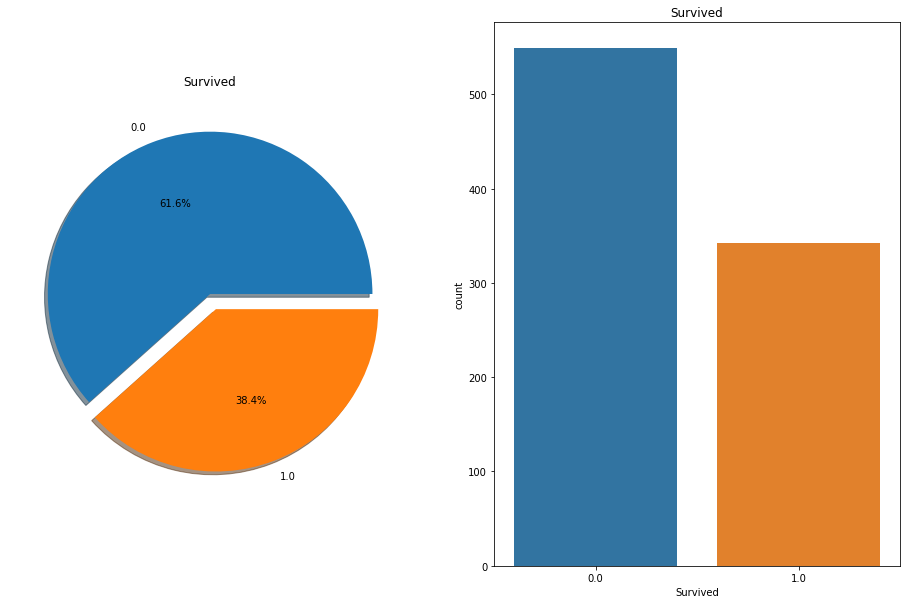

Survived: 0.38
Died: 0.62


In [5]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df["Survived"].value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", ax = axes[0], shadow = True)
axes[0].set_title("Survived")
axes[0].set_ylabel("")

sns.countplot("Survived", data = df, ax = axes[1])
axes[1].set_title("Survived")

plt.show()

num_survived = len(train_df.loc[train_df["Survived"] == 1])
print("Survived: {0:0.2f}\nDied: {1:0.2f}".format(num_survived / len(train_df), 1 - num_survived / len(train_df)))

# Step 2. EDA

데이터를 탐색하는데 있어서 가장 중요한 것은 데이터의 유형을 확인하는 것인다.

1. 정형 데이터 / 비정형 데이터 구분 -> 유형에 따라 다른 처리 방법 요구

2. 정형데이터인 경우, 연속형 데이터 / 이산형 데이터 / 범주형 데이터 / 순서형 데이터 등을 확인

3. 비정형 데이터인 경우, 각 데이터 유형에 따라 다른 접근 방법 필요

현재 데이터의 경우,

* 범주형 데이터: Sex, Embarked
* 순서형 데이터: PClass
* 연속형 데이터: Age

### Sex - Categorical

In [6]:
df[["Sex", "Survived"]]

,Sex,Survived
0,male,0.0
1,female,1.0
2,female,1.0
3,female,1.0
4,male,0.0
5,male,0.0
6,male,0.0
7,male,0.0
8,female,1.0
9,female,1.0


In [7]:
df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

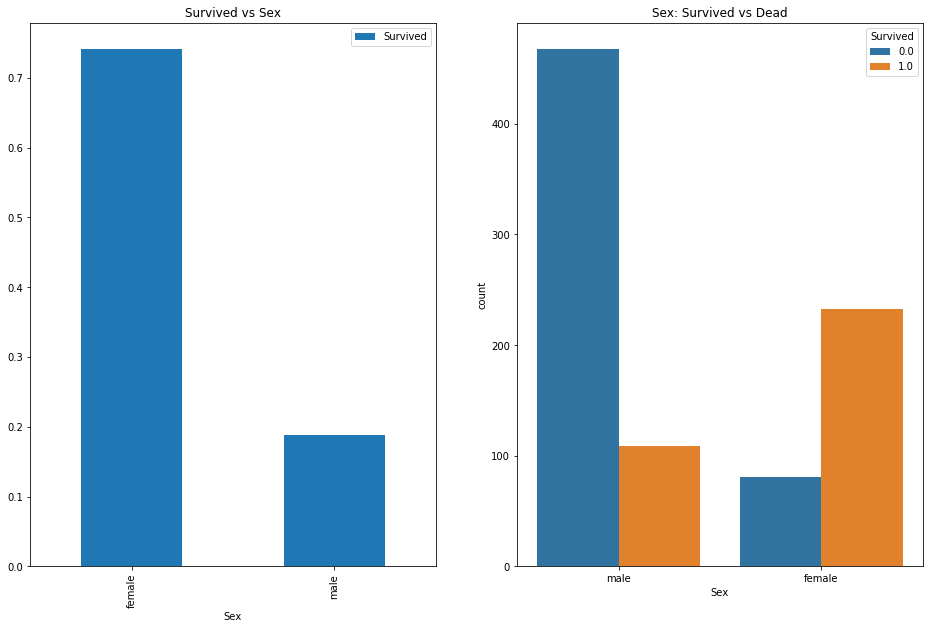

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax = axes[0])
axes[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue = "Survived", data = df, ax = axes[1])
axes[1].set_title("Sex: Survived vs Dead")

plt.show()

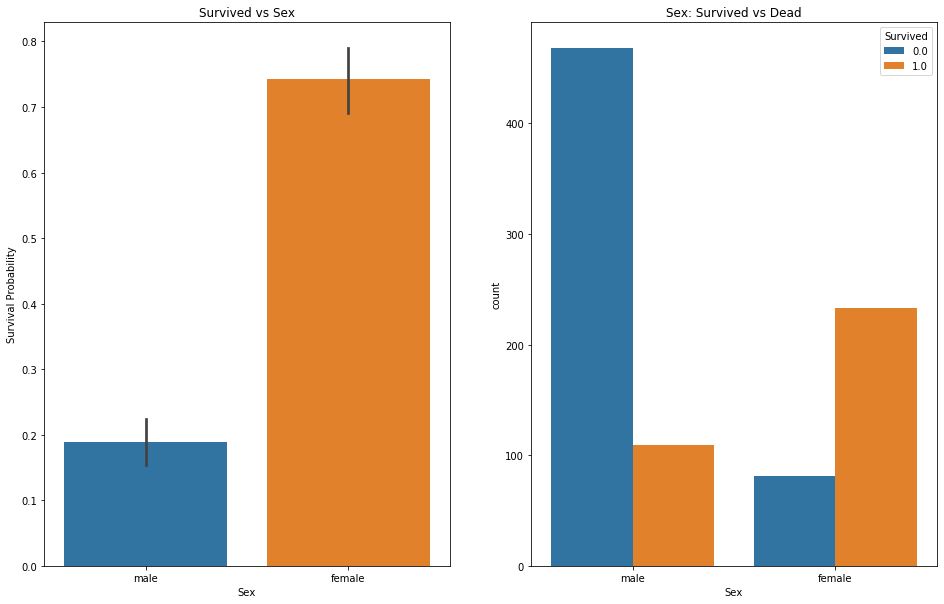

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

sns.barplot(x = "Sex", y = "Survived", data = df, ax = axes[0]) # 평균과 편차 표시
axes[0].set_ylabel("Survival Probability")
axes[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue = "Survived", data = df, ax = axes[1]) # 수 표시
axes[1].set_title("Sex: Survived vs Dead")

plt.show()

### Pclass - Categorical

In [10]:
pd.crosstab(df.Pclass, df["Survived"], margins = True).style.background_gradient(cmap = "summer_r")

Survived,0.0,1.0,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


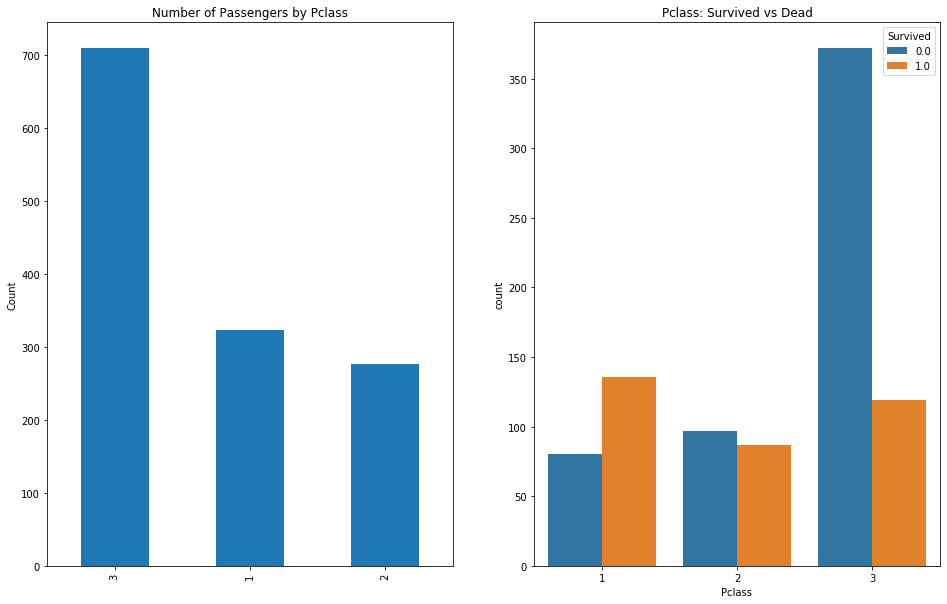

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df["Pclass"].value_counts().plot.bar(ax = axes[0])
axes[0].set_title("Number of Passengers by Pclass")
axes[0].set_ylabel("Count")

sns.countplot("Pclass", hue = "Survived", data = df, ax = axes[1])
axes[1].set_title("Pclass: Survived vs Dead")

plt.show()

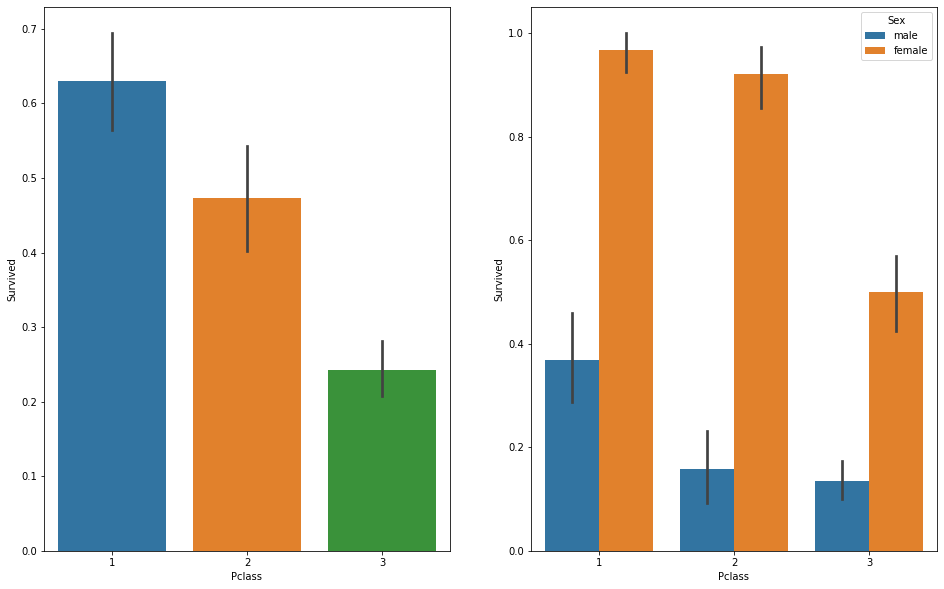

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

sns.barplot(x = "Pclass", y = "Survived", data = df, ax = axes[0])
axes[0].set_title("")

sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = df, ax = axes[1])
axes[1].set_title("")

plt.show()

In [13]:
pd.crosstab([df["Sex"], df["Survived"]], df["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

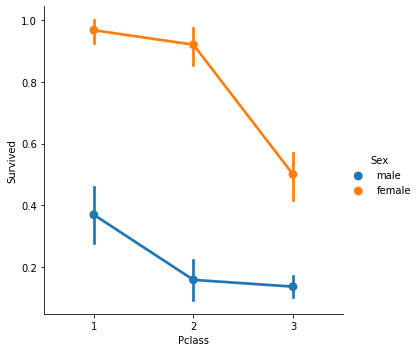

In [14]:
sns.factorplot("Pclass", "Survived", hue = "Sex", size = 5, data = df)

plt.show()

### Age - Continuous

In [15]:
print("Oldest Passenger was of: ", df["Age"].max(), "Years")
print("Youngest Passenger was of: ", df["Age"].min(), "Years")
print("Average Age on the Ship: {0:0.2f} Years".format(df["Age"].mean()))

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.17 Years
Average Age on the Ship: 29.88 Years


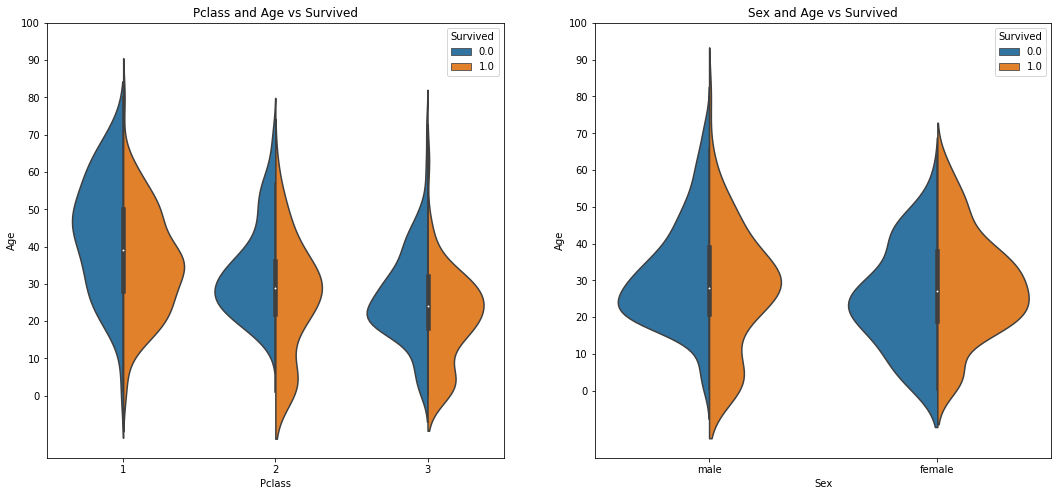

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

sns.violinplot("Pclass", "Age", hue = "Survived", data = df, split = True, ax = axes[0])
axes[0].set_title("Pclass and Age vs Survived")
axes[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue = "Survived", data = df, split = True, ax = axes[1])
axes[1].set_title("Sex and Age vs Survived")
axes[1].set_yticks(range(0, 110, 10))

plt.show()

Age의 경우 null 값이 매우 많다. 이것을 어떻게 해결할 것인가? 단순히 평균을 이용하기엔 데이터의 분포가 너무 넓다.

여기서 우리는 Age를 대략적으로 유추할 수 있는 특성을 찾고, 이를 바탕으로 나이를 유추해야한다.

해당 데이터에선 승객들의 이름에 각 인물들의 호칭(Initial, Title)이 붙어 있는데 이를 통해서 나이를 대략적으로 유추해보도록 하겠다.

In [17]:
df["Initial"] = 0
for i in df:
    df["Initial"] = df["Name"].str.extract("([A-Za-z]+)\.")

In [18]:
pd.crosstab(df["Initial"], df["Sex"]).T.style.background_gradient(cmap = "summer_r")

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [19]:
df["Initial"].replace(["Capt", "Col", "Countess", "Don", "Dona", "Jonkheer", "Lady", "Major", "Mlle", "Mme", "Ms", "Rev", "Sir"],
                     ["Mr", "Other", "Mrs", "Mr", "Miss", "Other", "Mrs", "Mr", "Miss", "Miss", "Miss", "Other", "Mr"], inplace = True)

In [20]:
df.loc[(df["Initial"] == "Dr") & (df["Sex"] == "male"), "Initial"] = "Mr"
df.loc[(df["Initial"] == "Dr") & (df["Sex"] == "female"), "Initial"] = "Miss"

In [21]:
df.groupby("Initial")["Age"].mean()

Initial
Master     5.482642
Miss      22.039769
Mr        32.517736
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

Filling NaN Ages

각 이니셜 별 나이의 평균을 구해 해당 값으로 나이의 null 값을 채워주었다.

In [22]:
df.loc[(df["Age"].isnull()) & (df["Initial"] == "Mr"), "Age"] = 33
df.loc[(df["Age"].isnull()) & (df["Initial"] == "Mrs"), "Age"] = 36
df.loc[(df["Age"].isnull()) & (df["Initial"] == "Master"), "Age"] = 5
df.loc[(df["Age"].isnull()) & (df["Initial"] == "Miss"), "Age"] = 22
df.loc[(df["Age"].isnull()) & (df["Initial"] == "Other"), "Age"] = 46

In [23]:
df["Age"].isnull().sum()

0

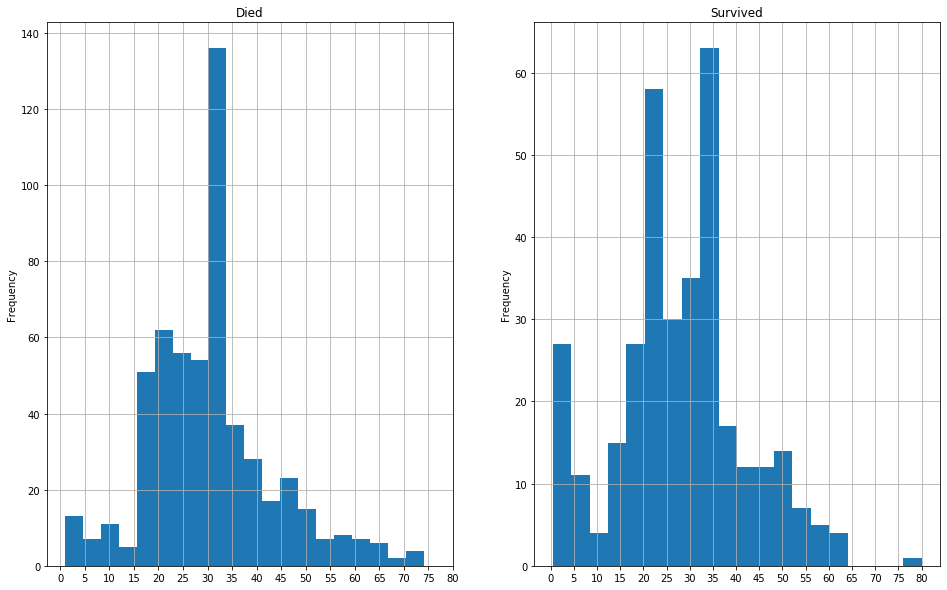

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df[df["Survived"] == 0]["Age"].plot.hist(ax = axes[0], bins = 20)
axes[0].set_title("Died")
x1 = list(range(0, 85, 5))
axes[0].set_xticks(x1)
axes[0].grid()

df[df["Survived"] == 1]["Age"].plot.hist(ax = axes[1], bins = 20)
axes[1].set_title("Survived")
x2 = list(range(0, 85, 5))
axes[1].set_xticks(x2)
axes[1].grid()

plt.show()

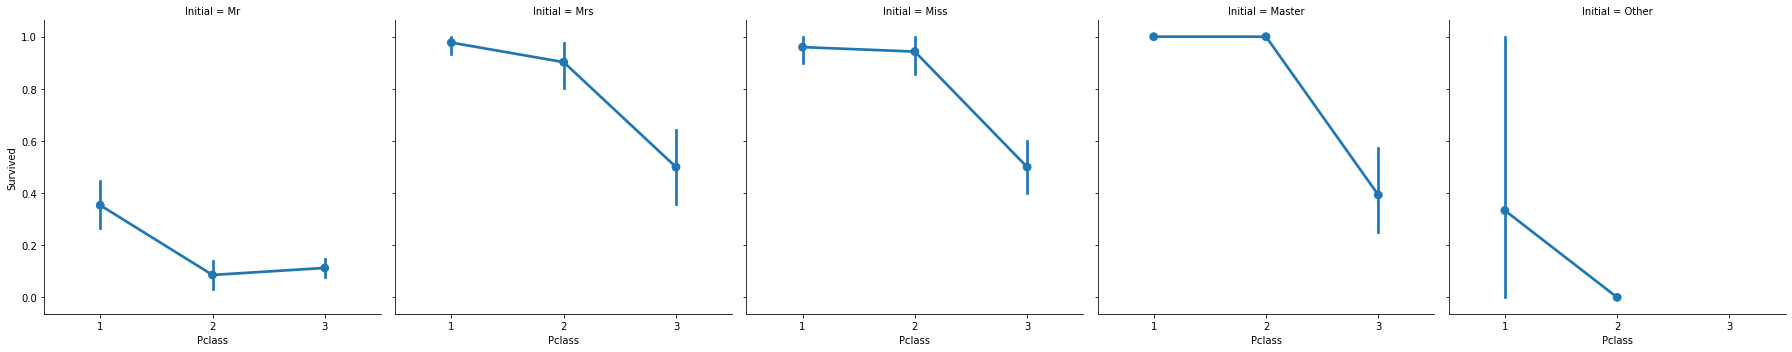

In [25]:
sns.factorplot("Pclass", "Survived", col = "Initial", data = df)

plt.show()

### Embarked - Categorical

In [26]:
pd.crosstab([df["Embarked"], df["Pclass"]], [df["Sex"], df["Survived"]], margins = True).style.background_gradient(cmap = "summer_r")

C Embarked 에서 대부분 1 class 승객들이 탔다는 것을 알 수 있다.

Q Embarked 에서 대부분 3 class 승객들이 탔다.

<Figure size 432x288 with 0 Axes>

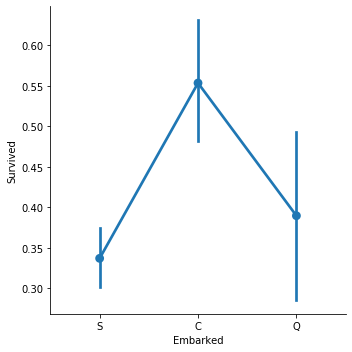

In [27]:
plt.figure()

sns.factorplot("Embarked", "Survived", data = df, size = 5)

plt.show()

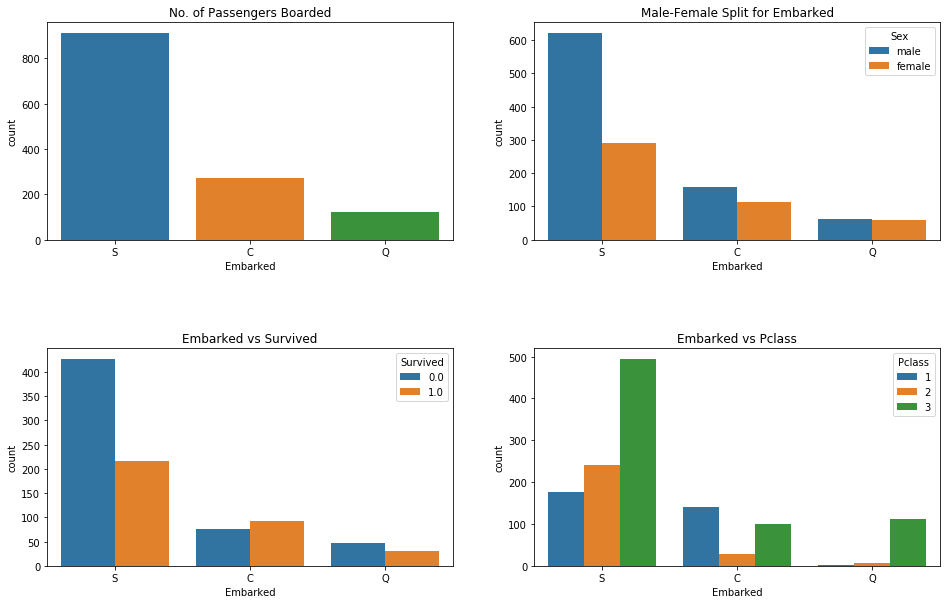

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (16, 10))

sns.countplot("Embarked", data = df, ax = axes[0, 0])
axes[0, 0].set_title("No. of Passengers Boarded")

sns.countplot("Embarked", hue = "Sex", data = df, ax = axes[0, 1])
axes[0, 1].set_title("Male-Female Split for Embarked")

sns.countplot("Embarked", hue = "Survived", data = df, ax = axes[1, 0])
axes[1, 0].set_title("Embarked vs Survived")

sns.countplot("Embarked", hue = "Pclass", data = df, ax = axes[1, 1])
axes[1, 1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

Observation

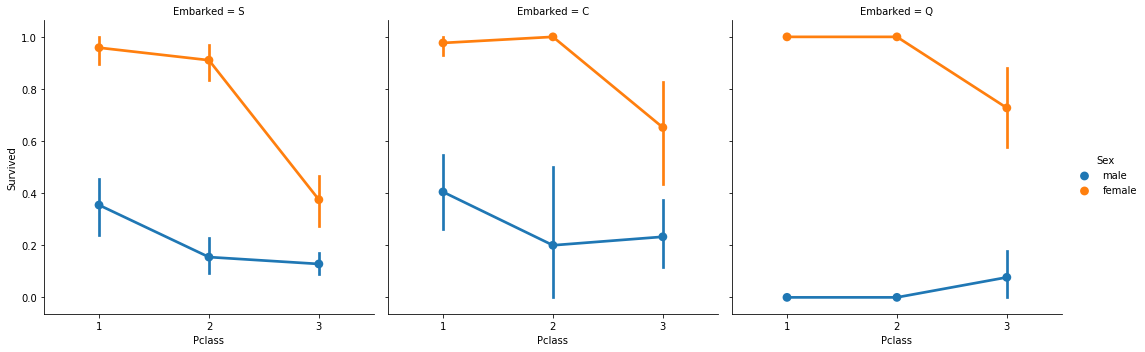

In [29]:
sns.factorplot("Pclass", "Survived", hue = "Sex", col = "Embarked", data = df)

plt.show()

Observation

Filling Embarked NaN

In [30]:
df["Embarked"].fillna("S", inplace = True)

In [31]:
df["Embarked"].isnull().sum()

0

### SibSp - Discrete Feature

In [32]:
pd.crosstab([df["SibSp"]], [df["Survived"]]).style.background_gradient(cmap = "summer_r")

Survived,0.0,1.0
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


단순 숫자만 봤을 땐, SibSp의 값이 작은 사람들의 생존자 수가 훨씬 많다. 하지만 표본 자체가 더 많은 것이기 때문에 섣불리 판단 내리기보다는 비율을 확인해봐야한다.

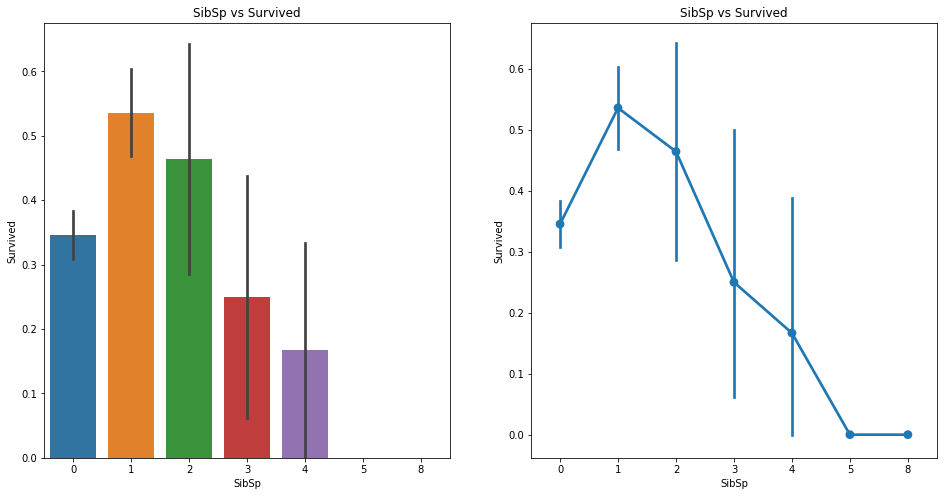

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

sns.barplot("SibSp", "Survived", data = df, ax = axes[0])
axes[0].set_title("SibSp vs Survived")

sns.pointplot("SibSp", "Survived", data = df, ax = axes[1])
axes[1].set_title("SibSp vs Survived")

plt.show()

In [34]:
pd.crosstab(df["SibSp"], df["Pclass"]).style.background_gradient(cmap = "summer_r")

Pclass,1,2,3
SibSp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


### Parch

In [35]:
pd.crosstab(df["Parch"], df["Pclass"]).style.background_gradient(cmap = "summer_r")

Pclass,1,2,3
Parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


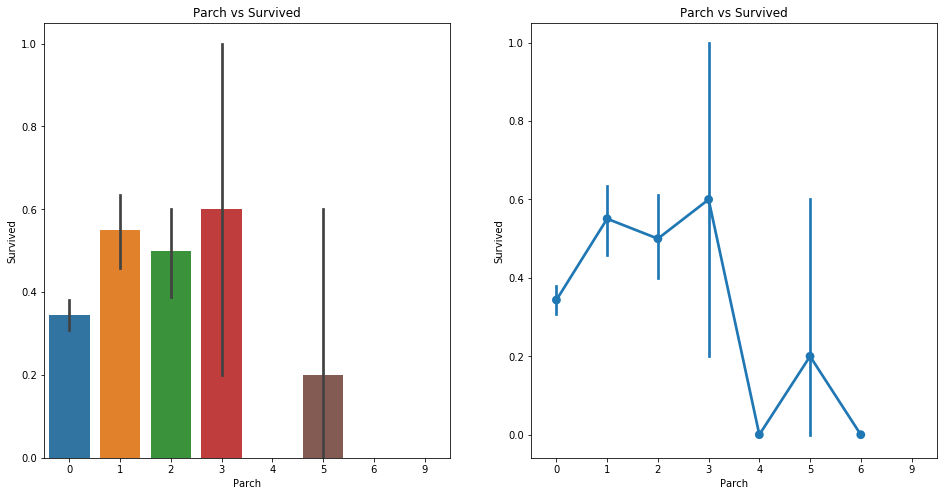

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

sns.barplot("Parch", "Survived", data = df, ax = axes[0])
axes[0].set_title("Parch vs Survived")

sns.pointplot("Parch", "Survived", data = df, ax = axes[1])
axes[1].set_title("Parch vs Survived")

plt.show()

### Fare - Continuous Feature

In [37]:
print("Highest Fare: ", df["Fare"].max())
print("Lowest Fare: ", df["Fare"].min())
print("Average Fare: ", df["Fare"].mean())

Highest Fare:  512.3292
Lowest Fare:  0.0
Average Fare:  33.29547928134557


In [38]:
df["Fare"].isnull().sum()

1

In [39]:
df.loc[df["Fare"].isnull() == True]

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial
1043,152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


0.0
69.55
14.435422064777327
8.05


(array([ 10., 336.,  63.,  26.,  25.,   7.,   8.,   0.,   8.,  11.]),
 array([ 0.   ,  6.955, 13.91 , 20.865, 27.82 , 34.775, 41.73 , 48.685,
        55.64 , 62.595, 69.55 ]),
 <a list of 10 Patch objects>)

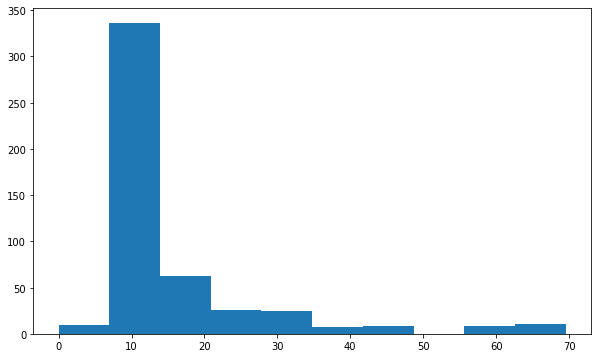

In [40]:
print(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"].min())
print(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"].max())
print(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"].mean())
print(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"].median())

plt.figure(figsize = (10, 6))

plt.hist(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"])

In [41]:
df["Fare"].fillna(df.loc[(df["Embarked"] == "S") & (df["Pclass"] == 3), "Fare"].mean(), inplace = True)

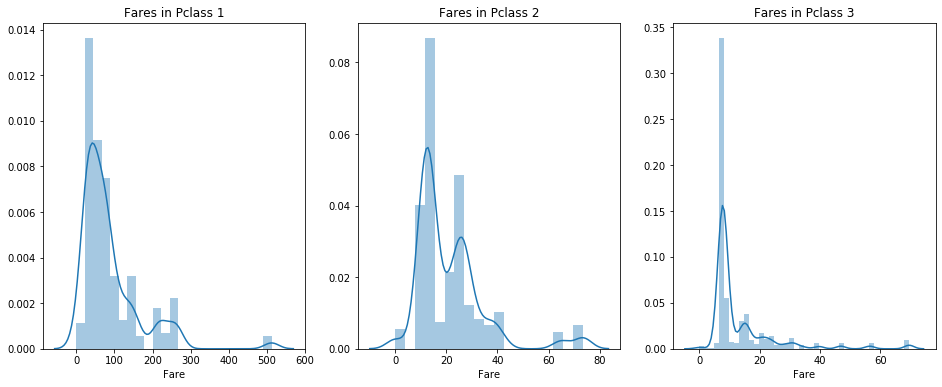

In [42]:
fig, axes = plt.subplots(1, 3, figsize = (16, 6))

sns.distplot(df.loc[df["Pclass"] == 1]["Fare"], ax = axes[0])
axes[0].set_title("Fares in Pclass 1")

sns.distplot(df.loc[df["Pclass"] == 2]["Fare"], ax = axes[1])
axes[1].set_title("Fares in Pclass 2")

sns.distplot(df.loc[df["Pclass"] == 3]["Fare"], ax = axes[2])
axes[2].set_title("Fares in Pclass 3")

plt.show()

### Correlation Between the Features

In [43]:
len(df.loc[df["Survived"].isnull() == False])

891

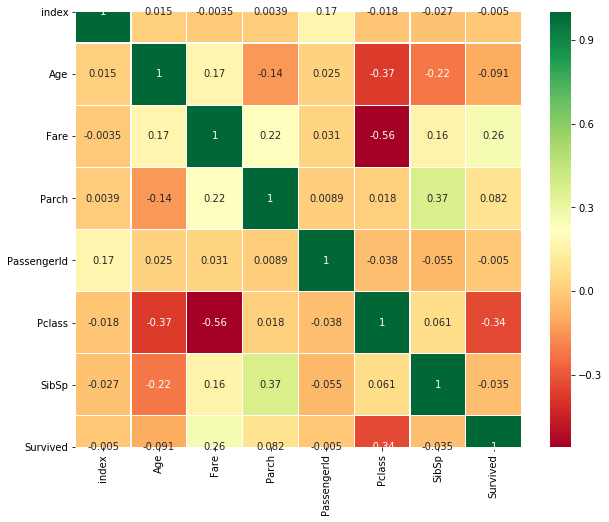

In [44]:
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn", linewidth = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

# Step 3. Feature Engineering

### Age band

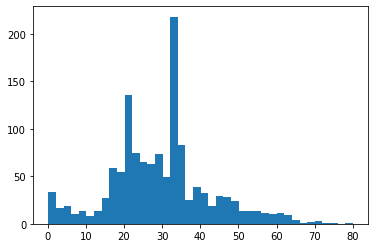

In [45]:
plt.hist(df["Age"], bins = 40)

plt.show()

In [46]:
df["Age_band"] = 0

df.loc[df["Age"] <= 16, "Age_band"] = 0
df.loc[(df["Age"] > 16) & (df["Age"] <= 32), "Age_band"] = 1
df.loc[(df["Age"] > 32) & (df["Age"] <= 48), "Age_band"] = 2
df.loc[(df["Age"] > 48) & (df["Age"] <= 64), "Age_band"] = 3
df.loc[df["Age"] > 64, "Age_band"] = 4

display(df.head())

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,Age_band
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,2


In [47]:
df["Age_band"].value_counts().to_frame().style.background_gradient(cmap = "summer")

,Age_band
1,575
2,473
0,142
3,106
4,13


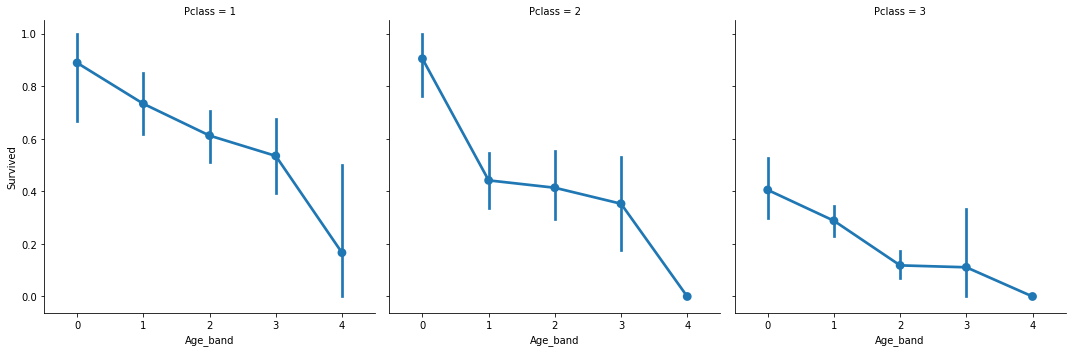

In [48]:
sns.factorplot("Age_band", "Survived", data = df, col = "Pclass")

plt.show()

### Family Size

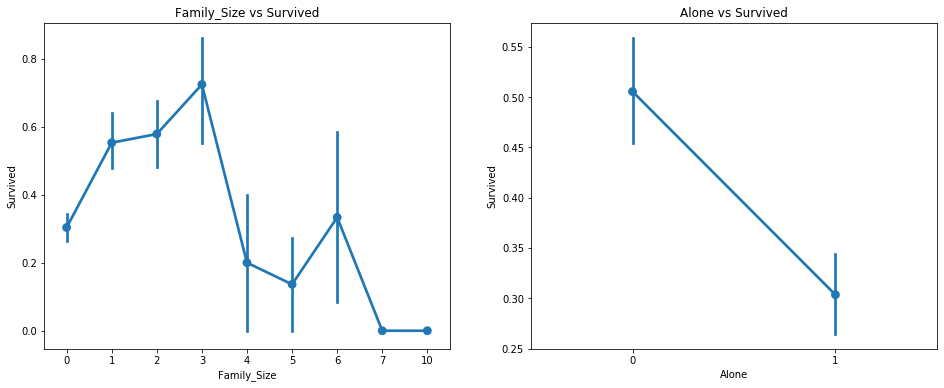

In [49]:
df["Family_Size"] = 0
df["Family_Size"] = df["Parch"] + df["SibSp"]
df["Alone"] = 0
df.loc[df["Family_Size"] == 0, "Alone"] = 1

fig, axes = plt.subplots(1, 2, figsize = (16, 6))

sns.pointplot("Family_Size", "Survived", data = df, ax = axes[0])
axes[0].set_title("Family_Size vs Survived")

sns.pointplot("Alone", "Survived", data = df, ax = axes[1])
axes[1].set_title("Alone vs Survived")

plt.show()

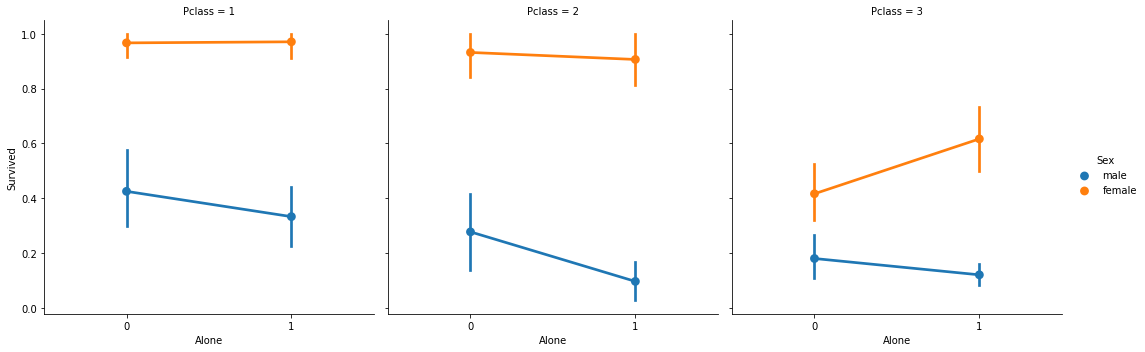

In [50]:
sns.factorplot("Alone", "Survived", data = df, hue = "Sex", col = "Pclass")

plt.show()

### Fare Range

In [51]:
df["Fare_log"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

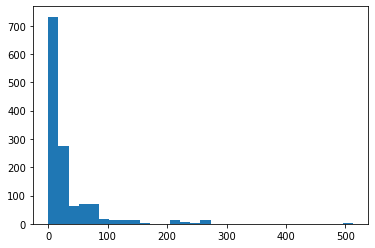

In [52]:
plt.hist(df["Fare"], bins = 30)

plt.show()

In [53]:
df["Fare_Range"] = pd.qcut(df["Fare"], 4)
df.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap = "summer_r")

,Survived
Fare_Range,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.6


In [54]:
df["Fare_cat"] = 0
df.loc[df["Fare"] <= 7.91, "Fare_cat"] = 0
df.loc[(df["Fare"] > 7.91) & (df["Fare"] <= 14.454), "Fare_cat"] = 1
df.loc[(df["Fare"] > 14.454) & (df["Fare"] <= 31), "Fare_cat"] = 2
df.loc[(df["Fare"] > 31) & (df["Fare"] <= 513), "Fare_cat"] = 3

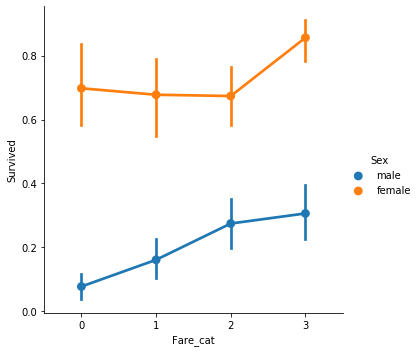

In [55]:
sns.factorplot("Fare_cat", "Survived", data = df, hue = "Sex")

plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### String -> Numeric

In [56]:
df["Sex"].replace(["male", "female"], [0, 1], inplace = True)
df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace = True)
df["Initial"].replace(["Mr", "Mrs", "Miss", "Master", "Other"], [0, 1, 2, 3, 4], inplace = True)

In [57]:
df_ = df.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis = 1)

In [58]:
df_ = df_[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Initial", "Age_band", "Family_Size", "Alone", "Fare_cat"]]

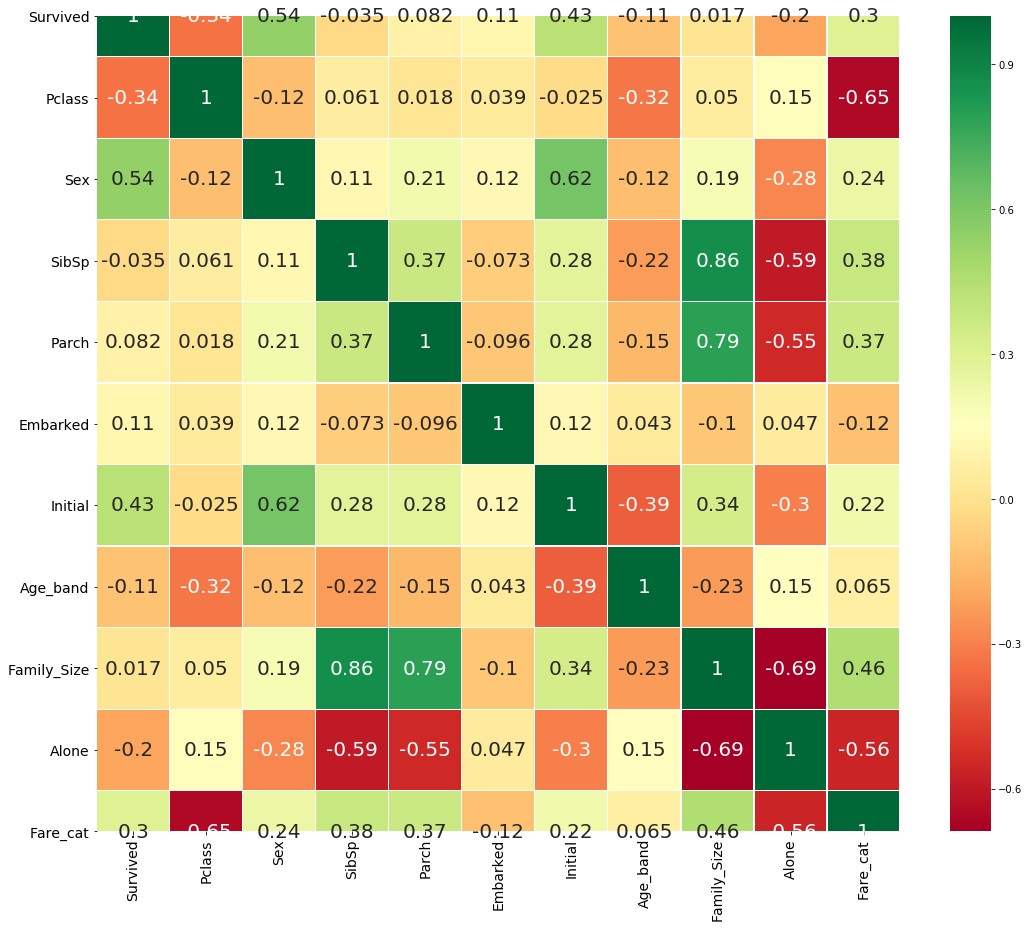

In [59]:
sns.heatmap(df_.corr(), annot = True, cmap = "RdYlGn", linewidths = 0.2, annot_kws = {"size": 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

# Modeling

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [61]:
train_df = df_[:891]
train_df, test_df = train_test_split(train_df, test_size = 0.3, random_state = 0, stratify = train_df["Survived"])

In [62]:
train_df.columns[1:]

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

In [63]:
X_train = train_df[train_df.columns[1:]]
y_train = train_df[train_df.columns[0]]

X_test = test_df[test_df.columns[1:]]
y_test = test_df[test_df.columns[0]]

### rbf - SVM

In [64]:
model = SVC(kernel = "rbf", C = 1, gamma = 0.1)
model.fit(X_train, y_train)

SVM_prediction = model.predict(X_test)

print("SVM acc: ", metrics.accuracy_score(SVM_prediction, y_test))

SVM acc:  0.835820895522388


### linear - SVM

In [65]:
model = SVC(kernel = "linear", C = 0.1, gamma = 0.1)
model.fit(X_train, y_train)

SVM_linear_prediction = model.predict(X_test)

print("SVM linear acc: ", metrics.accuracy_score(SVM_linear_prediction, y_test))

SVM linear acc:  0.8171641791044776


### Logistic Regression

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LR_prediction = model.predict(X_test)

print("LR acc: ", metrics.accuracy_score(LR_prediction, y_test))

LR acc:  0.8171641791044776


### DT

In [67]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DT_prediction = model.predict(X_test)

print("DT acc: ", metrics.accuracy_score(DT_prediction, y_test))

DT acc:  0.8059701492537313


### kNN

In [68]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

kNN_prediction = model.predict(X_test)

print("kNN acc: ", metrics.accuracy_score(kNN_prediction, y_test))

kNN acc:  0.832089552238806


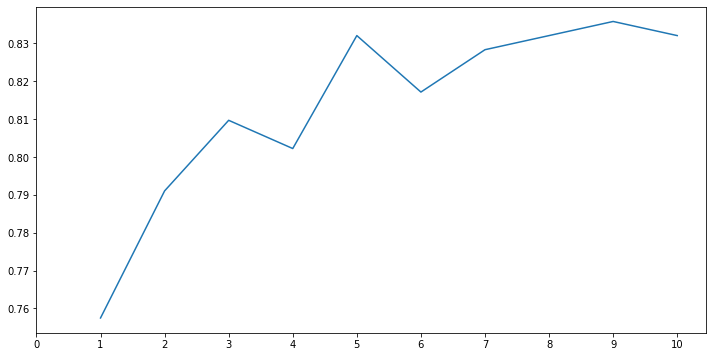

In [69]:
a_index = list(range(1, 11))
a = pd.Series()
x = list(range(11))

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()

In [70]:
a.values.max()

0.835820895522388

### Gaussian Naive Bayes

In [71]:
model = GaussianNB()
model.fit(X_train, y_train)

GNB_prediction = model.predict(X_test)

print("GNB acc: ", metrics.accuracy_score(GNB_prediction, y_test))

GNB acc:  0.8134328358208955


### Random Forests

In [72]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RF_prediction = model.predict(X_test)

print("RF acc: ", metrics.accuracy_score(RF_prediction, y_test))

RF acc:  0.8246268656716418


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is No, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation.

------------------------------------------

### Cross Validation

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [85]:
all_df = pd.concat([train_df, test_df])

X_train = all_df[all_df.columns[1:]]
y_train = all_df["Survived"]

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [88]:
kfold = KFold(n_splits = 10, random_state = 22)

xyz = []
accuracy = []
std = []
classifiers = ["Linear Svm", "Radial Svm", "Logistic Regression", "KNN", "Decision Tree",
              "Naive Bayes", "Random Forest"]
models = [SVC(kernel = "linear"), SVC(kernel = "rbf"), LogisticRegression(),
         KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(),
         RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_df = pd.DataFrame({"CV Mean": xyz, "Std": std}, index = classifiers)

In [89]:
display(new_models_df)

,CV Mean,Std
Linear Svm,0.789039,0.034465
Radial Svm,0.828315,0.042199
Logistic Regression,0.808102,0.032592
KNN,0.809276,0.052340
Decision Tree,0.812634,0.049688
Naive Bayes,0.804744,0.038151
Random Forest,0.820512,0.043875


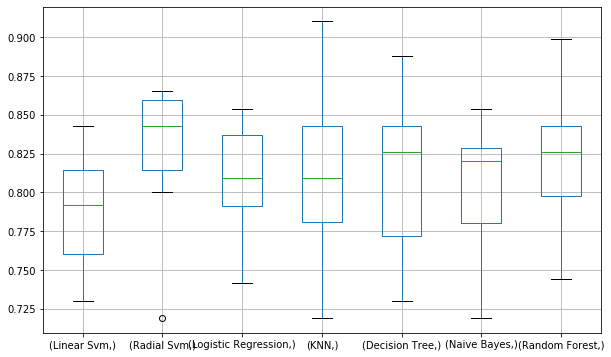

In [92]:
plt.figure(figsize = (10, 6))

box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

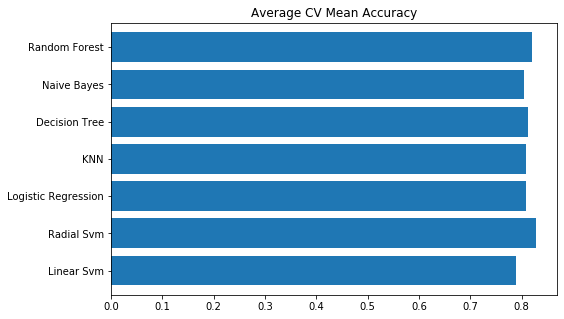

In [105]:
new_models_df["CV Mean"].plot.barh(width = 0.8)

plt.title("Average CV Mean Accuracy")
fig = plt.gcf()
fig.set_size_inches(8, 5)

plt.show()

### Confusion Matrix